In [19]:
import pandas as pd
import gdown 

file_id = '1_nyLNsT55X37Y0KDBXVXzSYsX-SoSqZi'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'feedbacks.csv')

dados = pd.read_csv('feedbacks.csv', delimiter=';')

Downloading...
From: https://drive.google.com/uc?id=1_nyLNsT55X37Y0KDBXVXzSYsX-SoSqZi
To: c:\Users\marce\Ciencias-de-Dados\DIO_Ifood-Dev-Week\feedbacks.csv
100%|██████████| 351/351 [00:00<?, ?B/s] 


In [23]:
def calcular_nps(notas):
    detratores = sum(notas.apply(lambda nota: nota <= 6))
    promotores = notas[notas >= 9].count()
    
    return (promotores - detratores) / len(notas) * 100

notas = dados['nota']

nps = calcular_nps(notas)

print(nps)

57.14285714285714


In [25]:
class Feedback:
    def __init__(self, nota, comentario):
        self.nota = nota
        self.comentario = comentario
        
class AnalisadorFeedback:
    def __init__(self, feedbacks):
        self.feedbacks = feedbacks
    
    def calcular_nps(self):
        detratores = sum(1 for feedback in self.feedbacks if feedback.nota <= 6)
        promotores = sum(1 for feedback in self.feedbacks if feedback.nota >= 9)
        
        return (promotores - detratores) / len(self.feedbacks) * 100
    
feedbacks = [Feedback(linha['nota'], linha['comentario']) for i, linha in dados.iterrows()]

analisador = AnalisadorFeedback(feedbacks)
nps = analisador.calcular_nps()

print(nps)
    

57.14285714285714


DIA 2
<p>Criação de gráfico para visualizar e compreender o nível de satisfação dos usuários</p>

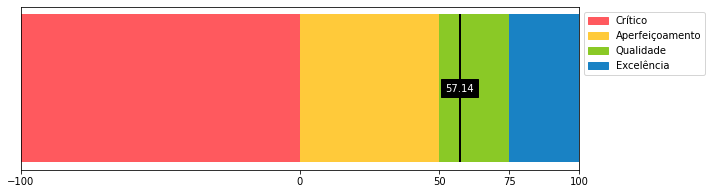

In [43]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Definição das constantes que usaremos para visualizar o NPS
nps_zonas = ['Crítico', 'Aperfeiçoamento', 'Qualidade', 'Excelência']
nps_valores = [-100, 0, 50 ,75, 100]
nps_cores = ['#FF595E', '#FFCA3A', '#8AC926', '#1982C4']

# Criar um gráfico com matplotlib para visualizar o NPS
def criar_grafico_nps(nps):
    fig, ax = plt.subplots(figsize=(10, 3))
    
    for i, zona in enumerate(nps_zonas):
        ax.barh([0], width=nps_valores[i+1] - nps_valores[i], left=nps_valores[i], color=nps_cores[i])
    
    ax.barh([0], width=0.5,left=nps, color='black')
    ax.set_yticks([])
    ax.set_xticks(nps_valores)
    ax.set_xlim(-100, 100)
    
    plt.text(nps, 0, f'{nps:.2f}', ha='center', va='center', color='w', bbox=dict(facecolor='black'))
    
    patches = [mpatches.Patch(color=nps_cores[i], label=nps_zonas[i]) for i in range(len(nps_zonas))]
    plt.legend(handles=patches, bbox_to_anchor=(1, 1))
    
    plt.show();


criar_grafico_nps(nps)

DIA 3